## SVD - PCA: More Applications
---


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os

### Eigenfaces reference 

>- The seminal paper on Eigenfaces [MIT Media Lab](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition)

>- Above paper arranged as easy lecture notes on [ScholarPedia] by Dr. Zhang and Dr. Tucker (http://scholarpedia.org/article/Eigenfaces)

>- Chapter 1 from Textbook By Dr. Brunton

---

### Summary of the mathematics for eigenfaces
---
>- The Columns of matrix $X$ represent facial images after thorough preproessing (cropping, centering, alignment etc).

>- The mean-adjusted faces $\tilde{X} = X - \bar{X}$, where $\bar{X} = \frac{1}{M} \sum_{j=1}^M X_{:j}$ (called the mean face). (Note that the data here is not column centered but row centered.)

>- Find eigendecomposition of $S = \frac{1}{M-1}(X-\bar{X})^T (X-\bar{X})$ (one can also just use $M$ in place of $M-1$): 
$$
SV = \Lambda V
$$

>- Equivalent SVD formulation: $(X-\bar{X}) = U \sum V^T$, implying $\tilde{X} V = U \sum$.

<div class="alert alert-success">
<strong>Note</strong> that in place of taking the usual approach of finding the eigen-decomposition of $(X-\bar{X}) (X-\bar{X})^T$, the above approach works better if the dimension of the images is larger compared to the number of images. The former would be preferred if the number of images is way more relative to the dimension.
</div>

>- **Face Space**: Columns of $U$ are called the eigenfaces of the facial image database given by matrix $X$. They form the face space whose origin is the average face and whose axes are the eigenfaces.

>- **Low rank ($k$ eigenfaces) representation** of the image database
$$\tilde{X}  = U_{(k)} \Sigma_{(k)} V_{(k)}^T$$

### Face Reconstruction
**Retriving** the $p$-th image from the low rank representation
$$
\begin{align}
X_{:p} - \bar{X} &\approx U_{(k)} \left[ \Sigma_{(k)} V^T_{(k)} \right]_{:p}\\
X_{:p} &\approx \bar{X} + U_{(k)} \left[ \Sigma_{(k)} V^T_{(k)} \right]_{:p}\\
&= \bar{X} + U_{(k)} \left[  V_{(k)} \Sigma_{(k)} \right]_{p:}\\
&= \bar{X} + \sum_{j=1}^k \alpha_j U_{:j} \quad \text{ where }\ \alpha_j = \sigma_j V_{pj} = \sqrt{\lambda_j (M-1)}\;V_{pj}
\end{align}
$$

### Face Detection

>- Projection of an image x on the face space $ U_{(k)}  U_{(k)}^T (x-\bar{x})$.

>- Distance of the projection from the original 
$$
\delta = \|\tilde{x} - U_{(k)}  U_{(k)}^T \tilde{x}\|
$$

>- The distance of a face from the face space is smaller compared to other kind of images such as a doc, a tree, or cup etc.

### Face Recognition

>- Find the linear coding (or weight vector) in projecting an image $\tilde{x} = x - \bar{x}$ to the face space:
$$
\alpha =  U_{(k)}^T  \tilde{x}
$$

>- An image could belong to a class $k$ if the 
$$
\|\alpha - \alpha_k\| \le \theta,\ \text{ a predefined threshold }
$$

>- If the threshold criteria is not met then the image is declared unknown.

#### Eigenface Example:

>-Following example is from a [blog by Nev Acar](https://towardsdatascience.com/eigenfaces-recovering-humans-from-ghosts-17606c328184). Only some minor modifications have been made to the original code.

In [6]:
"""It helps visualising the portraits from the dataset."""
def plot_portraits(images, titles, h, w, n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

Dimensions: (1000, 64, 64)


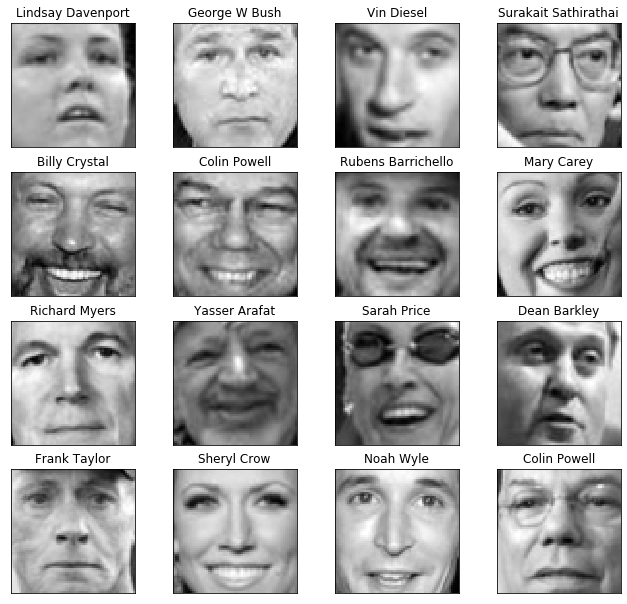

In [9]:
dir='lfwcrop_grey/faces'
#dir='YALE/centered'
celebrity_photos=os.listdir(dir)[1:1001]
celebrity_images=[dir+'/' + photo for photo in celebrity_photos]
images=np.array([plt.imread(image) for image in celebrity_images], dtype=np.float64)
celebrity_names=[name[:name.find('0')-1].replace("_", " ") for name in celebrity_photos]
n_samples, h, w = images.shape
print("Dimensions:",images.shape)
plot_portraits(images, celebrity_names, h, w, n_row=4, n_col=4)

In [44]:
def eigenfaces(X, n_pc):
    n_samples, n_features = X.shape
    mean = np.mean(X, axis=0)
    centered_data = X-mean
    pca_obj = PCA(n_components=n_pc)
    projected  = pca_obj.fit_transform(centered_data)
    #U, S, V = np.linalg.svd(centered_data)
    components = pca_obj.components_
    #projected = U[:,:n_pc]*S[:n_pc]
    
    return projected, components, mean, centered_data

In [45]:
n_components = 200
X = images.reshape(n_samples, h*w)
P, C, M, Y= eigenfaces(X, n_components)

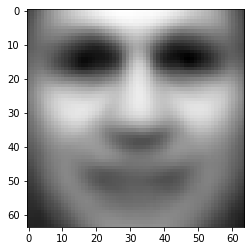

In [40]:
# The mean-face
plt.imshow(M.reshape((h, w)), cmap=plt.cm.gray)
plt.show()

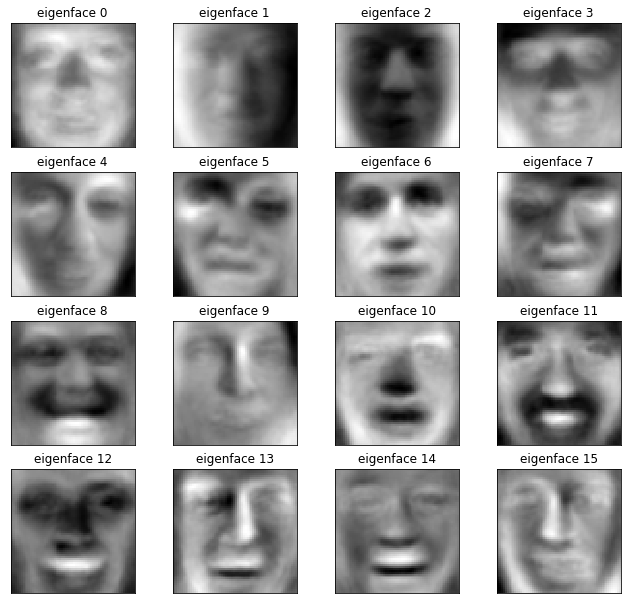

In [41]:
eigenfaces = C.reshape((n_components, h, w))
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_portraits(eigenfaces, eigenface_titles, h, w, 4, 4) 

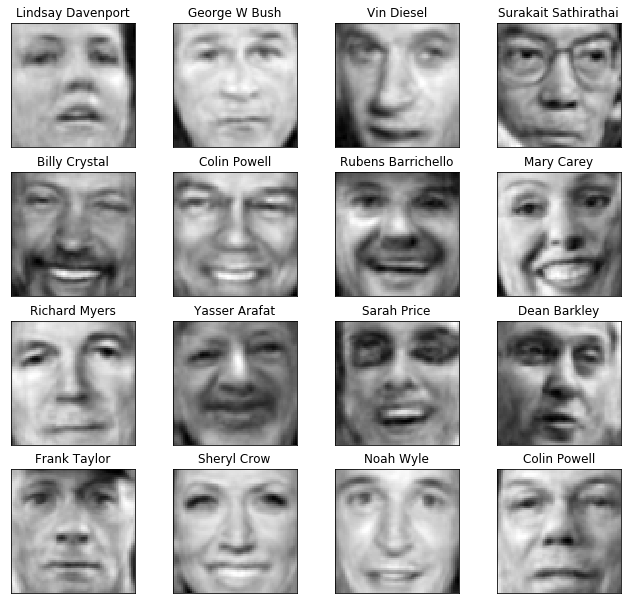

In [46]:

def reconstruction(Y, C, M, h, w, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector).reshape(h, w)
    return recovered_image
recovered_images=[reconstruction(Y, C, M, h, w, i) for i in range(len(images))]
plot_portraits(recovered_images, celebrity_names, h, w, n_row=4, n_col=4)

#### Some observations on eigenfaces (Brunton)

>- First few eigenfaces 'capture the most common features shared among all human faces...'

>- '... while the other PCs will be more useful in distinguishing between individuals...'

>- '... additional PCs my capture differences in lighting angles.'

#### Alignment of data and SVD
<div class="alert alert-danger">
"<strong>SVD is sensitive to the alignment in data.</strong> In fact the SVD rank explodes when objects in the columns translate, rotate or scale, which severely limits its use for data that has not been heavily preprocessed"
</div>

### Robust PCA
---
**Question**: Do you agree that finding the first-$k$ PCs is equivalent to solving the following problem? Provide your reasoning.

$$\large
\operatorname{minimize}\ \|\tilde{X}-L\|_F,  \textrm{ subject to }\ \operatorname{rank}(L) \leq k.
$$

<div class="alert alert-block alert-danger">
Note: PCA is sensitive to presence of outliers and errors in dataset.
</div>

<font style="color:blue; font-weight:bold;"> Robust Principal Component Analysis </font>: Decomposition as $X \approx L+S$, such that $L$ represents the low-rank structure in the data and $S$ represents sparse `noise' in $A$.

<div class='eqnbox'>
$$\large
\operatorname{minimize}\ \|L\|_* + \lambda\, \|S\|_1
$$
</div>

where $\|L\|_* = \sigma_1 + \cdots+ \sigma_r$ is called the **nuclear norm** of $L$ and $\lambda$ is a penalty parameter.

>- In some applications such as video surveillance, we are interested in 'noise'.


>- Choice of $\lambda = 1/ \sqrt{max(n,\,m)}$ works well, so we can avoid parameter tuning.

>- <font color='green'>Principal component pursuit</font> is a popular method for this optimization. Under certain non-stringent conditions it is possible to find the low-rank and sparse components with high probability. 

[Reading 3](https://arxiv.org/abs/0912.3599) 

#### Question: How does $L_1$ norm induce sparsity? LASSO vs Ridge.
<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg" width="80%" />

[Image Source: WikiMedia](https://upload.wikimedia.org/wikipedia/commons/f/f8/L1_and_L2_balls.svg)

**READING: Augmented Lagrangian Method** for solving constrained optimization problems.

[University of Winsconsin Notes](http://pages.cs.wisc.edu/~swright/nd2016/IMA_augmentedLagrangian.pdf)

[Wikipedia](https://en.wikipedia.org/wiki/Augmented_Lagrangian_method)

>- Here is a detailed set of [notes on RPCA](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/3.%20Background%20Removal%20with%20Robust%20PCA.ipynb)

>- Here is a quick [blog on RPCA](https://kojinoshiba.com/robust-pca/)